# Prosper Loan Data Visual analysis
## by E.Karaseva

## Investigation Overview

- Do Prosper loans perform well?
- What for the most loans are taken?
- What is the most expensive loan category? 
- How individuals choose duration of the loan? 


## Dataset Overview

Prosper Marketplace is America's first peer-to-peer lending marketplace, with over 7 billion USD in funded loans. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from 2,000 USD to 35,000 USD per loan request. 

The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df=pd.read_csv('prosperLoanData.csv')


## Number of taken loans and its performance

The number of taken loans is split into two groups due to 2008 crisis. After 2009 gap, the amount of taken loans drastically increased. However, performance of loans didn't really improved much.

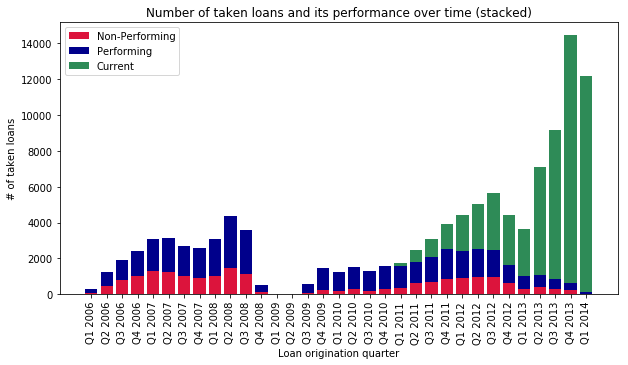

In [3]:
quarters_order=['Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 
              'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007',
              'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
              'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q4 2009',
              'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010',
              'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011',
              'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
              'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 
              'Q1 2014']
base_blue = sb.color_palette()[0]
color1=['crimson', 'darkblue', 'seagreen']
loan_df['Performing']=np.nan
#loan_df[(loan_df['LoanStatus']=='Completed')|(loan_df['LoanStatus']=='Current')|(loan_df['LoanStatus']=='FinalPaymentInprogress')]
loan_df.loc[(loan_df['LoanStatus']=='Completed')|#(loan_df['LoanStatus']=='Current')|
            (loan_df['LoanStatus']=='FinalPaymentInProgress'), 'Performing']='Performing'
loan_df.loc[(loan_df['LoanStatus']=='Chargedoff')|(loan_df['LoanStatus']=='Defaulted')|
            (loan_df['LoanStatus']=='Past Due (1-15 days)') |(loan_df['LoanStatus']=='Past Due (16-30 days)')|
            (loan_df['LoanStatus']=='Past Due (31-60 days)')|(loan_df['LoanStatus']=='Past Due (61-90 days)')|
            (loan_df['LoanStatus']=='Past Due (91-120 days)')|(loan_df['LoanStatus']=='Past Due (>120 days)'),#|
            #(loan_df['LoanStatus']=='Cancelled'), 
            'Performing']='Non-Performing'
loan_df.loc[(loan_df['LoanStatus']=='Current'), 'Performing']='Current'

# code from udacity lessons
cat1_order=quarters_order
cat2_order=['Non-Performing', 'Performing', 'Current']
plt.figure(figsize=[10, 5])
baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,

    cat2 = cat2_order[i]
    inner_counts = loan_df[loan_df['Performing'] == cat2]['LoanOriginationQuarter'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines, color=color1[i])
    baselines += inner_counts[cat1_order]


plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order, loc = 2)
plt.xticks(rotation=90);
plt.ylabel('# of taken loans');
plt.xlabel('Loan origination quarter');
plt.title('Number of taken loans and its performance over time (stacked)');

## Loans per category

- The most popular category of loans is for debt consolidation, while the leas one is for recreational vehicles (RV). 
- The highest amounts of loans are taken for debt consolidation and 'Baby & adoption' category, and the least one for student use.


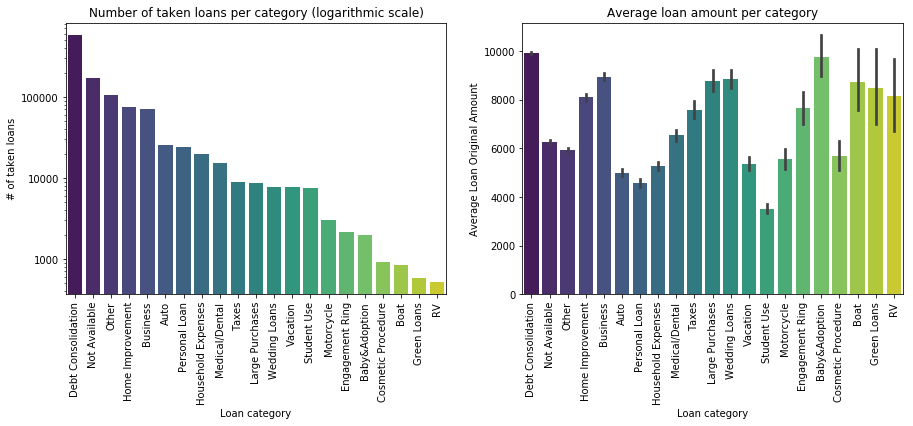

In [4]:
ListingCategory_dict = {0 : "Not Available", 1 : "Debt Consolidation", 2: "Home Improvement", 
                        3 : "Business", 4 : "Personal Loan", 5 : "Student Use", 6 : "Auto",
                        7: "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure", 
                        11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses",
                        14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV", 
                        18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}
ListingCategory_order=loan_df['ListingCategory (numeric)'].value_counts().index
loan_df['ListingCategory (numeric)'].value_counts()
ListingCategory_dict_order=[]
for i in ListingCategory_order:
    ListingCategory_dict_order.append(ListingCategory_dict[i])


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ListingCategory (numeric)', order=ListingCategory_order, palette='viridis', ax=ax1)

ax1.set_yscale('log')
tick_locs = [10, 100, 1000, 10000, 100000]
ax1.set_yticklabels(tick_locs);

ax1.set_xticklabels(ListingCategory_dict_order)
for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
ax1.set_xlabel('Loan category');
ax1.set_ylabel('# of taken loans');
ax1.set_title('Number of taken loans per category (logarithmic scale)')


sb.barplot(data = loan_df, x = 'ListingCategory (numeric)', y = 'LoanOriginalAmount',  
               order=ListingCategory_order, palette='viridis', ax=ax2); 


ax2.set_xticklabels(ListingCategory_dict_order)
for tick in ax2.get_xticklabels():
        tick.set_rotation(90)
ax2.set_xlabel('Loan category');
ax2.set_ylabel('Average Loan Original Amount');
ax2.set_title('Average loan amount per category'); 

## Average loan original amount for different loan duration over time

Higher loan amounts are taken for longer periods.

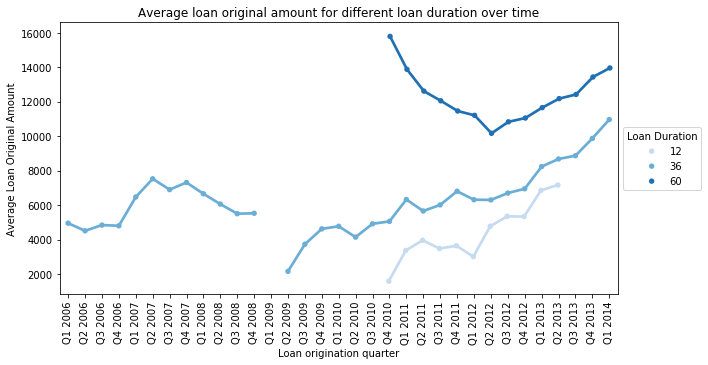

In [5]:
plt.figure(figsize = [10,5])

ax = sb.pointplot(data = loan_df, x = 'LoanOriginationQuarter', y = 'LoanOriginalAmount', hue = 'Term',
                  markers=".",order=quarters_order,hue_order=[12,36,60], palette='Blues', dodge=True,  join=True,
                  ci=None)
plt.xticks(rotation = 90)
plt.xlabel('Loan origination quarter')
plt.ylabel('Average Loan Original Amount')
plt.title('Average loan original amount for different loan duration over time')
ax.legend(loc = 6,  bbox_to_anchor = (1.0, 0.5), title="Loan Duration");
#ax.legend(['Non-performing loans', 'Performing loans', 'Currently running'])

Check your output by using nbconvert to export the notebook and set up a server for the slides. From the terminal or command line, use the following expression:
>  `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`
